<a href="https://colab.research.google.com/github/SoumeshNayak/DeepLearning-Image-Classification/blob/main/CIFAR_10_Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c cifar-10

100% 714M/715M [00:34<00:00, 24.5MB/s]
100% 715M/715M [00:34<00:00, 21.9MB/s]


In [3]:
!ls


 cifar-10.zip   kaggle.json  '~p'   sample_data


In [4]:
from zipfile import ZipFile
dataset='/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("dATA set extrated")

dATA set extrated


In [5]:
!ls

 cifar-10.zip  '~p'	      sampleSubmission.csv   train.7z
 kaggle.json    sample_data   test.7z		     trainLabels.csv


In [6]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 99.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.8 MB/s eta 0:00:00


In [7]:
import py7zr

archive=py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [8]:
!ls

 cifar-10.zip  '~p'	      sampleSubmission.csv   train      trainLabels.csv
 kaggle.json    sample_data   test.7z		     train.7z


In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import  matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
# Check how many files are there in train folder
filenames=os.listdir('/content/train')

In [13]:
filenames[:10]

['19757.png',
 '48375.png',
 '39889.png',
 '47267.png',
 '21479.png',
 '27873.png',
 '43430.png',
 '35926.png',
 '49782.png',
 '32274.png']

In [14]:
len(filenames)

50000

In [15]:
# So train floder contain 50000 image with labels in trainlabels.csv
df=pd.read_csv("/content/trainLabels.csv")

In [16]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
df.shape

(50000, 2)

Label Processing

In [22]:
# Note in filename list we have image like 7790.png the 7790 is if of trainlabel.csv
print(filenames[1])
filenames[1].split('.')[0]

48375.png


'48375'

In [23]:
df[df["id"]==int(filenames[1].split('.')[0])]

,id,label
48374,48375,ship


In [25]:
# convert the string to integer ot numbers in label coluns
df.groupby('label').count()

,id
label,
airplane,5000
automobile,5000
bird,5000
cat,5000
deer,5000
dog,5000
frog,5000
horse,5000
ship,5000


In [26]:
labels_dictionary={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

In [27]:
labels=[labels_dictionary[i] for i in df['label']]

In [30]:
labels[:5]

[6, 9, 9, 4, 1]

In [29]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [31]:
len(labels)

50000

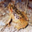

In [33]:
# display sample image
import cv2
img=cv2.imread('/content/train/7796.png') #img in the form of numpy array
#show the image
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [34]:
# Now read images in order filenames is not in order
id_list=list(df['id'])

In [35]:
id_list[:5]

[1, 2, 3, 4, 5]

In [36]:
#convert image to numpy array
train_data_folder='/content/train/'

data=[]

for id in id_list:
  image_path=train_data_folder + str(id) + '.png'
  image=Image.open(image_path)
  image=np.array(image)
  data.append(image)


In [37]:
len(data)

50000

In [38]:
type(data)

list

In [39]:
data[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [40]:
type(data[0])

numpy.ndarray

In [41]:
data[0].shape

(32, 32, 3)

In [43]:
# So we have label and data to train the model
labels[:5],len(data)

([6, 9, 9, 4, 1], 50000)

In [44]:
#convert images list and labels list to numpy array
X=np.array(data)
y=np.array(labels)

In [46]:
type(X),
type(y)

numpy.ndarray

In [47]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
X_train.shape,X_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3))

In [51]:
#Scale the data(0 to 1)
X_train_scaled=X_train/255
X_test_scaled=X_test/255


In [52]:
print(X_test_scaled)

[[[[0.99215686 0.87843137 0.71764706]
   [0.99215686 0.88235294 0.7254902 ]
   [0.99607843 0.89411765 0.73333333]
   ...
   [1.         0.88627451 0.72941176]
   [0.99607843 0.88235294 0.7254902 ]
   [0.99215686 0.87843137 0.72156863]]

  [[0.97647059 0.8745098  0.71764706]
   [0.98039216 0.87843137 0.7254902 ]
   [0.98431373 0.89019608 0.74117647]
   ...
   [0.98823529 0.8745098  0.71764706]
   [0.98431373 0.87058824 0.71372549]
   [0.98039216 0.86666667 0.71372549]]

  [[0.98039216 0.88235294 0.72941176]
   [0.98823529 0.89411765 0.74509804]
   [0.99607843 0.90588235 0.76078431]
   ...
   [0.99215686 0.8745098  0.71372549]
   [0.98823529 0.8745098  0.71764706]
   [0.98431373 0.87058824 0.71372549]]

  ...

  [[0.98431373 0.87058824 0.71372549]
   [0.98823529 0.8745098  0.71764706]
   [0.98823529 0.8745098  0.71764706]
   ...
   [0.98823529 0.8745098  0.71372549]
   [0.98823529 0.8745098  0.71764706]
   [0.98431373 0.87058824 0.71372549]]

  [[0.98431373 0.87058824 0.71372549]
   [0.9

In [53]:
# Building the model
import tensorflow as tf
from tensorflow import keras


In [54]:
number_of_classes=10

#setting up the layers of neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(number_of_classes,activation='softmax')
])

In [56]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [57]:
#training the neural network
model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 9s 4ms/step - loss: 1.9709 - acc: 0.2867 - val_loss: 1.9327 - val_acc: 0.2882
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8310 - acc: 0.3469 - val_loss: 1.8023 - val_acc: 0.3503
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7980 - acc: 0.3600 - val_loss: 1.8130 - val_acc: 0.3537
Epoch 4/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7747 - acc: 0.3700 - val_loss: 1.7722 - val_acc: 0.3715
Epoch 5/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7545 - acc: 0.3767 - val_loss: 1.7277 - val_acc: 0.3817
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7402 - acc: 0.3817 - val_loss: 1.7278 - val_acc: 0.3853
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7250 - acc: 0.3861 - val_loss: 1.7418 - val_acc: 0.3725
Epoch 8/10
1125/1125 [==============================] - 4s 3ms

In [61]:
# SO Accurucy is less
# So we use Transfer Learning we use ResNet50
from tensorflow.keras import Sequential,layers,models
from tensorflow.keras.layers import Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers


In [60]:
conv_base=ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(256,256,3)
)
conv_base.summary()

94765736/94765736 [==============================] - 6s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [64]:
from tensorflow.python.ops.gen_nn_ops import max_pool_grad_eager_fallback
model=Sequential()
# Now our image is 32,32,3
model.add(layers.UpSampling2D((2,2))) # height of image*2,width of image*2
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
#Now after using UpSampling2D out image is 256,256,3
model.add(conv_base)

model.add(Flatten())
model.add(BatchNormalization()) # Helps for scaling and training would be faster

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(number_of_classes,activation='softmax'))

In [65]:
model.compile(optimizer= optimizers.RMSprop(lr=2e-5),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [66]:
his=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 487s 384ms/step - loss: 1.7855 - acc: 0.3605 - val_loss: 1.4237 - val_acc: 0.4835
Epoch 2/10
1125/1125 [==============================] - 430s 382ms/step - loss: 1.2360 - acc: 0.5726 - val_loss: 1.1005 - val_acc: 0.6158
Epoch 3/10
1125/1125 [==============================] - 438s 389ms/step - loss: 1.0585 - acc: 0.6421 - val_loss: 0.8391 - val_acc: 0.7025
Epoch 4/10
1125/1125 [==============================] - 437s 389ms/step - loss: 0.9232 - acc: 0.6888 - val_loss: 1.1004 - val_acc: 0.6370
Epoch 5/10
1125/1125 [==============================] - 438s 389ms/step - loss: 0.8268 - acc: 0.7284 - val_loss: 0.7986 - val_acc: 0.7320
Epoch 6/10
1125/1125 [==============================] - 438s 389ms/step - loss: 0.7494 - acc: 0.7541 - val_loss: 0.8239 - val_acc: 0.7150
Epoch 7/10
1125/1125 [==============================] - 438s 389ms/step - loss: 0.6706 - acc: 0.7824 - val_loss: 0.7066 - val_acc: 0.7600
Epoch 8/10
1125/1125 [============

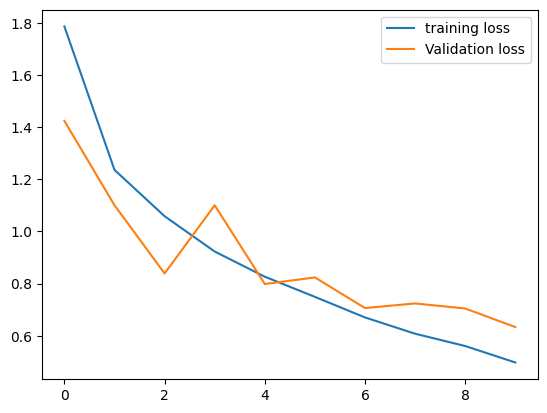

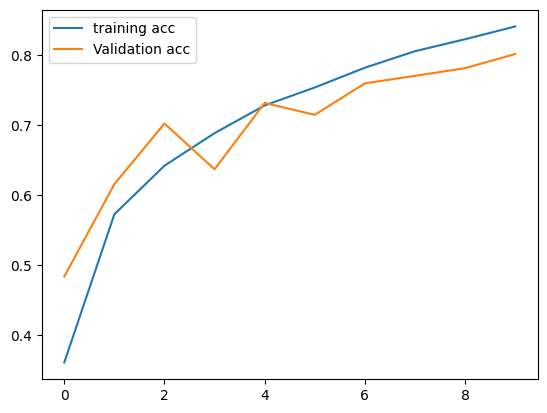

In [68]:
plt.plot(his.history['loss'],label='training loss')
plt.plot(his.history['val_loss'],label='Validation loss')
plt.legend()
plt.show()


plt.plot(his.history['acc'],label='training acc')
plt.plot(his.history['val_acc'],label='Validation acc')
plt.legend()
plt.show()